In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

2024-01-30 10:14:04.125052: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 10:14:04.277820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 10:14:04.277932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 10:14:04.280482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 10:14:04.301987: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 10:14:04.307047: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))


dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(lr=0.01)

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-01-30 10:14:09.804694: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1287/1287 [==============================] - 6s 4ms/step - loss: 0.3683 - accuracy: 0.8196 - val_loss: 0.2643 - val_accuracy: 0.8754
Epoch 2/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.2312 - accuracy: 0.8910 - val_loss: 0.2071 - val_accuracy: 0.9083
Epoch 3/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.1945 - accuracy: 0.9131 - val_loss: 0.1865 - val_accuracy: 0.9160
Epoch 4/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.1730 - accuracy: 0.9265 - val_loss: 0.1637 - val_accuracy: 0.9359
Epoch 5/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.1562 - accuracy: 0.9374 - val_loss: 0.1486 - val_accuracy: 0.9428
Epoch 6/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.1445 - accuracy: 0.9432 - val_loss: 0.1402 - val_accuracy: 0.9460
Epoch 7/10
1287/1287 [==============================] - 4s 3ms/step - loss: 0.1368 - accuracy: 0.9470 - val_loss: 0.1419 - val_accuracy:

FPR: [0.10073352 0.05870879]
TPR: [0.94129121 0.89926648]
FNR: [0.05870879 0.10073352]
TNR: [0.89926648 0.94129121]
Precision: 0.8922842638584749
Accuracy: 0.9126883154486668
F1-score: 0.9033105285784727
FPR: 0.0797211563783962
tpr: 0.9202788436216038
fnr: 0.0797211563783962
tnr: 0.9202788436216038


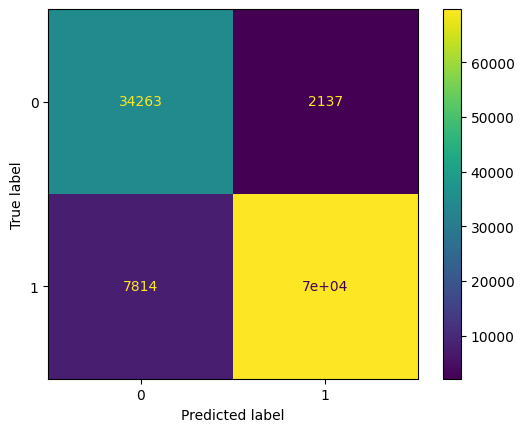

In [5]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_hat, average='macro')
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='macro')
# auc = roc_auc_score(y_test, dnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
# print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "dnn",
    "Accuracy": accuracy,
    "Precision": precision,
    "F1-score": f1,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    # "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/UNSW/model.csv", mode='a', index=False)